In [148]:
#Import Python Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree 
from datetime import datetime, timedelta
import os
import json
import pandas as pd
import numpy as np
from collections import Counter

In [149]:
# Handle File Names and Paths
#input_file_path :  this is full path descriptor of input file

input_dir = os.path.join("/", "opt","jupyter","data","csv" )
input_file = 'activity_speed' + '.csv'
input_file_path = os.path.join(input_dir , input_file)

print ("Input file is (full path)  ", input_file_path)

Input file is (full path)   /opt/jupyter/data/csv/activity_speed.csv


In [150]:
# Create Pandas DataFrame containing the speed related data and information
# this data frame is a sub-set of the overall project data
# The dataframe is indexed on time - time series data
df = pd.read_csv(input_file_path, index_col = 'time',  parse_dates=True)

In [151]:
del df_sec

In [152]:
df_sec = df.asfreq(freq='S', )

In [153]:
df_sec['speed'] = float(0)
df_sec['distance'] = float(0)

In [154]:
df_sec[:10]

,distance_diff,time_diff,speed,moving,breaks,distance
2015-09-13 06:25:51,0.000000,1,0,False,False,0
2015-09-13 06:25:52,NaN,NaN,0,NaN,NaN,0
2015-09-13 06:25:53,NaN,NaN,0,NaN,NaN,0
2015-09-13 06:25:54,NaN,NaN,0,NaN,NaN,0
2015-09-13 06:25:55,NaN,NaN,0,NaN,NaN,0
2015-09-13 06:25:56,23.080000,5,0,True,False,0
2015-09-13 06:25:57,6.650002,1,0,True,False,0
2015-09-13 06:25:58,NaN,NaN,0,NaN,NaN,0
2015-09-13 06:25:59,NaN,NaN,0,NaN,NaN,0
2015-09-13 06:26:00,5.910000,3,0,True,False,0


In [155]:
df_sec.moving.fillna(method = 'bfill', inplace=True)

In [156]:
df_sec.breaks.fillna(method = 'bfill', inplace=True)

In [157]:
df_sec[ (df_sec.time_diff.notnull() )][:14]

,distance_diff,time_diff,speed,moving,breaks,distance
2015-09-13 06:25:51,0.000000,1,0,False,False,0
2015-09-13 06:25:56,23.080000,5,0,True,False,0
2015-09-13 06:25:57,6.650002,1,0,True,False,0
2015-09-13 06:26:00,5.910000,3,0,True,False,0
2015-09-13 06:26:03,11.439999,3,0,True,False,0
2015-09-13 06:26:07,22.039997,4,0,True,False,0
2015-09-13 06:26:13,37.270004,6,0,True,False,0
2015-09-13 06:26:14,9.119995,1,0,True,False,0
2015-09-13 06:26:17,16.870003,3,0,True,False,0
2015-09-13 06:26:20,16.210007,3,0,True,False,0


In [158]:
num_rows = len( df_sec[ (df_sec.time_diff.notnull() )] )
for i in range( num_rows ):
    row = df_sec[ (df_sec.time_diff.notnull() )].iloc[i] 
    row_time = row.name
    if row.breaks == False:
        start_time = row_time - timedelta(seconds = ( int(row.time_diff) - 1))
        #print( str(row.time_diff) + str(row_time) + str(start_time))
        new_dist = ( row.distance_diff / int(row.time_diff) ) 
        df_sec[ start_time:row_time ].distance = new_dist
        df_sec[ start_time:row_time ].speed = new_dist * 3.6
        #print( my_df[start_time:row_time] )

In [159]:
del df_sec['distance_diff']
del df_sec['time_diff']

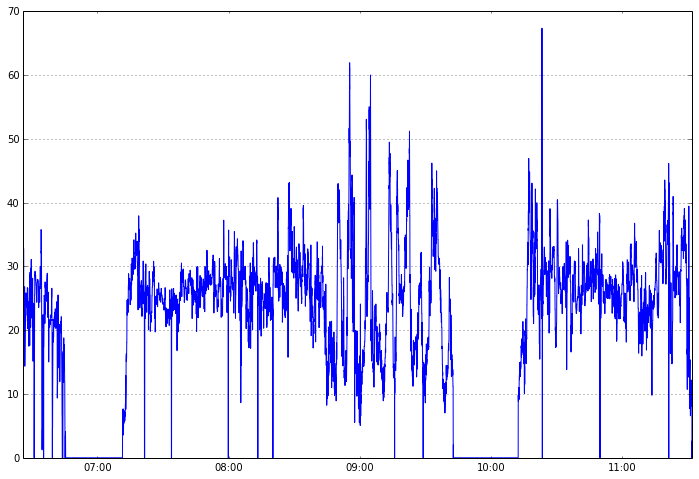

In [160]:
_ = df_sec['speed'].plot(figsize=(12,8))

In [161]:
df_sec[:15]

,speed,moving,breaks,distance
2015-09-13 06:25:51,0.000000,False,False,0.000000
2015-09-13 06:25:52,16.617600,True,False,4.616000
2015-09-13 06:25:53,16.617600,True,False,4.616000
2015-09-13 06:25:54,16.617600,True,False,4.616000
2015-09-13 06:25:55,16.617600,True,False,4.616000
2015-09-13 06:25:56,16.617600,True,False,4.616000
2015-09-13 06:25:57,23.940005,True,False,6.650002
2015-09-13 06:25:58,7.092000,True,False,1.970000
2015-09-13 06:25:59,7.092000,True,False,1.970000
2015-09-13 06:26:00,7.092000,True,False,1.970000
